In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

### Load Dataset

In [82]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


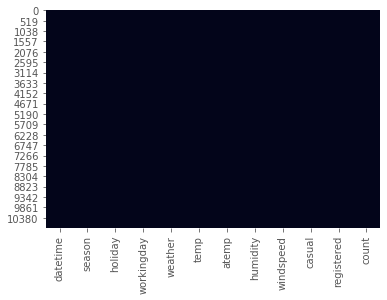

In [86]:
#결측치 확인
sns.heatmap(train.isnull(),cbar=False) 

In [73]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

#### Parse datetime

In [121]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 23)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [75]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


### Explore

#### Datetime

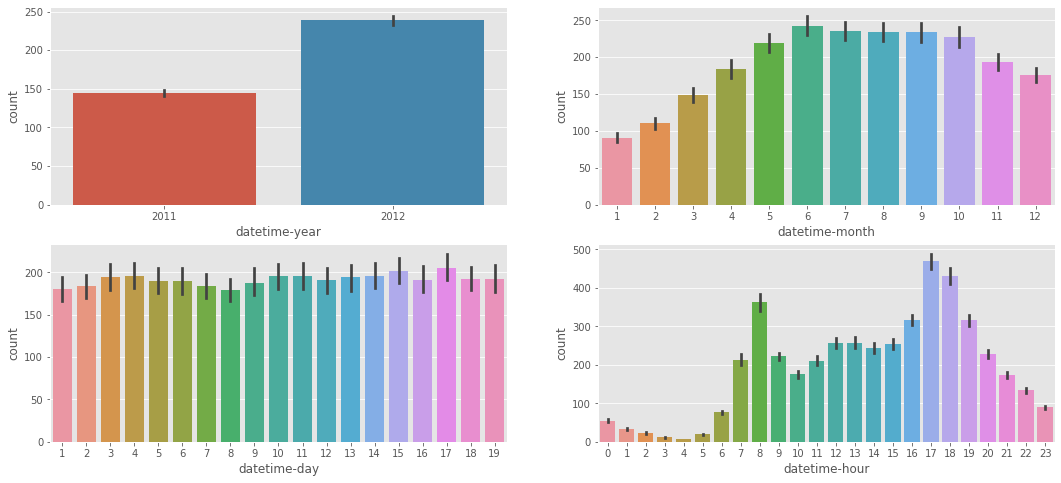

In [76]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)


#### Weather

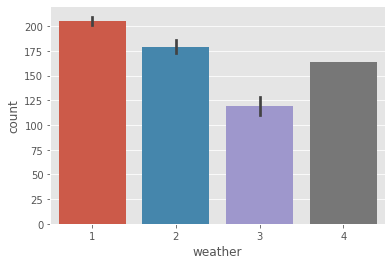

In [77]:
sns.barplot(data=train, x="weather", y="count") #신뢰 구간이 4인경우에 보이지않음

#### Windspeed

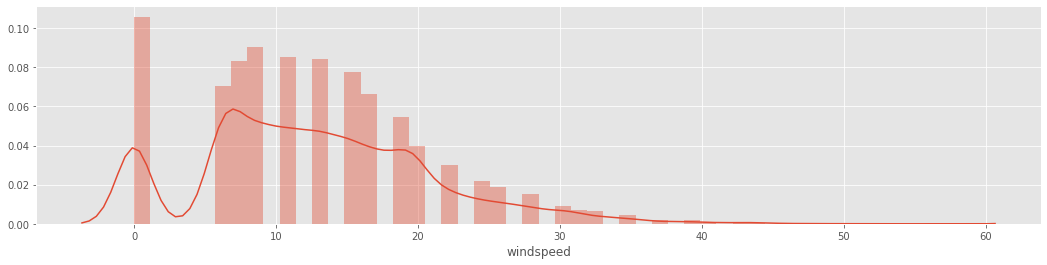

In [78]:
plt.figure(figsize = (18,4))
sns.distplot(train["windspeed"])

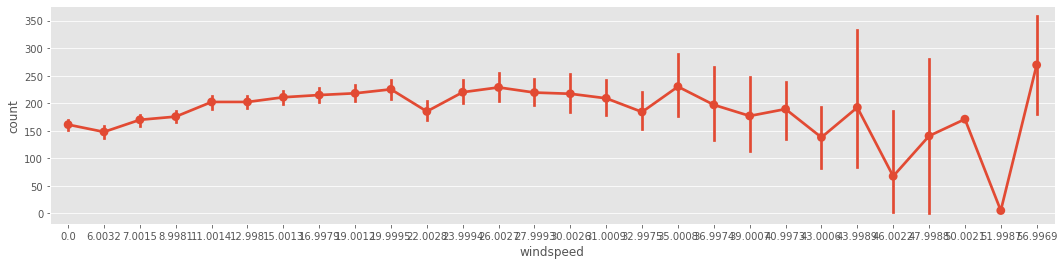

In [79]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="windspeed", y="count")

In [80]:
train["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


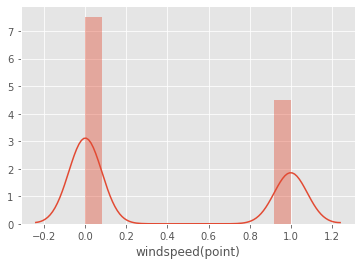

In [87]:
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')
print(train["windspeed(point)"].unique().round(3))
sns.distplot(train["windspeed(point)"])

#### Temp

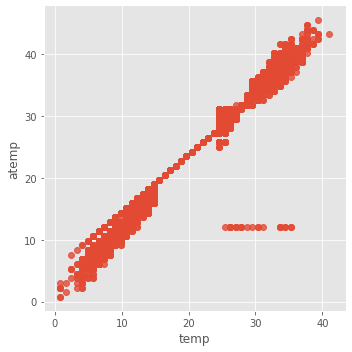

In [89]:
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False) #fit_reg : 추세선 유무

In [92]:
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [95]:
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

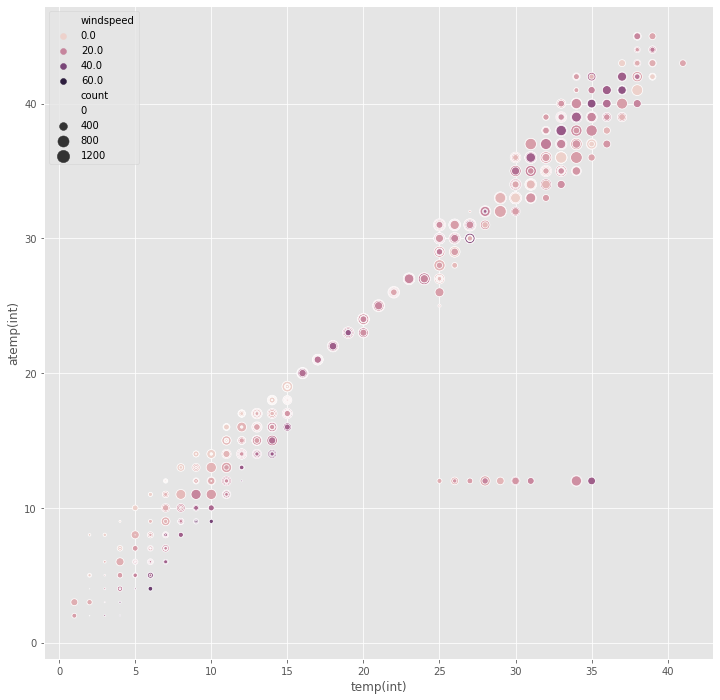

In [98]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

plt.figure(figsize = (12,12))

sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0,150))

In [100]:
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]
train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


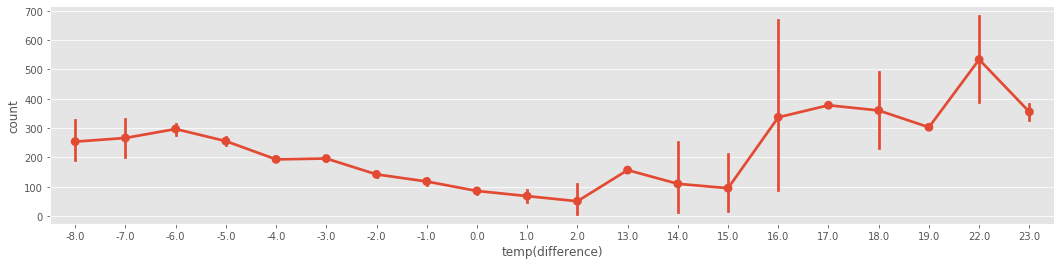

In [102]:
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="temp(difference)", y="count")

In [105]:
train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

-4.0    5106
-3.0    2097
-2.0    1415
-5.0    1049
-1.0     509
-6.0     431
 0.0     279
Name: temp(difference), dtype: int64


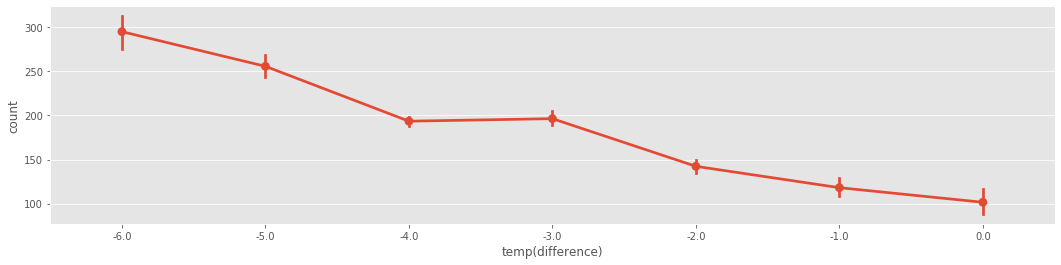

In [119]:
#0 ~ -6을 제외한 나머지는 모수가 부족하므로 하나로 통일 시켜줌
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] > 0, "temp(difference)"] = 0
print(train["temp(difference)"].value_counts())
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="temp(difference)", y="count")

#### Datetime- dayofweek

In [127]:
train["datetime-dayofweek"] = train["datetime"].dt.day_name()
train["datetime-dayofweek(int)"] = train["datetime"].dt.dayofweek
print(train.shape)
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(10886, 25)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5


In [130]:
test["datetime-dayofweek"] = test["datetime"].dt.day_name()
test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek
print(test.shape)
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3


#### datetime-dayofweek 컬럼 시각화

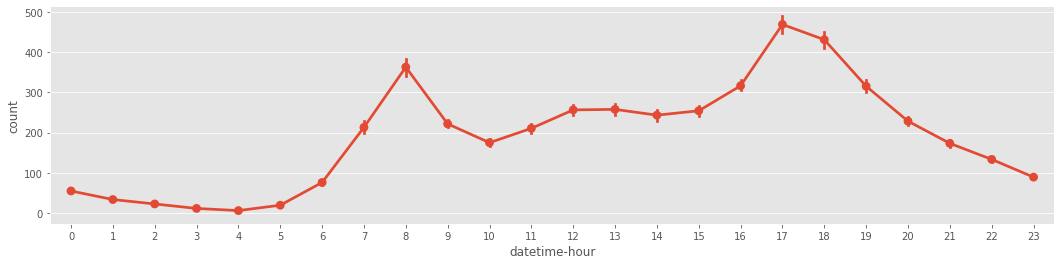

In [134]:
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="datetime-hour", y="count")

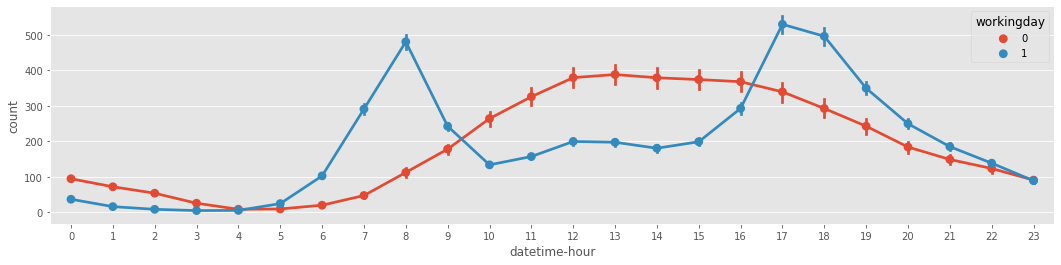

In [137]:
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

일하지 않는 날과 일하는 날의 차이가 명확하게 드러남

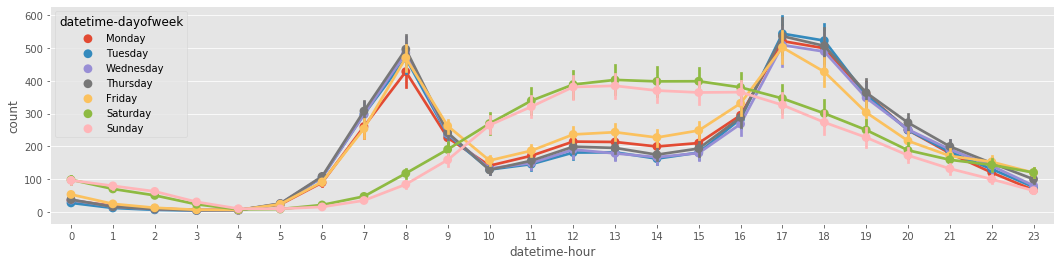

In [141]:
plt.figure(figsize = (18,4))
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

In [144]:
#범주형 데이터이므로 One Hot Encoding

# dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#"datetime-dayofweek(Mon)","datetime-dayofweek(Tue)","datetime-dayofweek(Wed)","datetime-dayofweek(Thu)",
# "datetime-dayofweek(Fri)","datetime-dayofweek(Sat)","datetime-dayofweek(Sun)"
train["datetime-dayofweek(Mon)"] = train["datetime-dayofweek"] == "Monday"
train["datetime-dayofweek(Tue)"] = train["datetime-dayofweek"] == "Tuesday"
train["datetime-dayofweek(Wed)"] = train["datetime-dayofweek"] == "Wednesday"
train["datetime-dayofweek(Thu)"] = train["datetime-dayofweek"] == "Thursday"
train["datetime-dayofweek(Fri)"] = train["datetime-dayofweek"] == "Friday"
train["datetime-dayofweek(Sat)"] = train["datetime-dayofweek"] == "Saturday"
train["datetime-dayofweek(Sun)"] = train["datetime-dayofweek"] == "Sunday"

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-second,datetime-dayofweek,datetime-dayofweek(int),datetime-dayofweek(Mon),datetime-dayofweek(Tue),datetime-dayofweek(Wed),datetime-dayofweek(Thu),datetime-dayofweek(Fri),datetime-dayofweek(Sat),datetime-dayofweek(Sun)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,Saturday,5,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,Saturday,5,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,Saturday,5,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,Saturday,5,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,Saturday,5,False,False,False,False,False,True,False


In [165]:
#범주형 데이터이므로 One Hot Encoding

# dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
test["datetime-dayofweek(Mon)"] = test["datetime-dayofweek"] == "Monday"
test["datetime-dayofweek(Tue)"] = test["datetime-dayofweek"] == "Tuesday"
test["datetime-dayofweek(Wed)"] = test["datetime-dayofweek"] == "Wednesday"
test["datetime-dayofweek(Thu)"] = test["datetime-dayofweek"] == "Thursday"
test["datetime-dayofweek(Fri)"] = test["datetime-dayofweek"] == "Friday"
test["datetime-dayofweek(Sat)"] = test["datetime-dayofweek"] == "Saturday"
test["datetime-dayofweek(Sun)"] = test["datetime-dayofweek"] == "Sunday"

In [166]:
#출퇴근 시간 표시
train["timetowork"] = (train["datetime-hour"]>=7)&(train["datetime-hour"]<=9)&(train["workingday"]==1)
train["timetohome"] = (train["datetime-hour"]>=16)&(train["datetime-hour"]<=19)&(train["workingday"]==1)
train[["timetowork","timetohome"]]

test["timetowork"] = (test["datetime-hour"]>=7)&(test["datetime-hour"]<=9)&(test["workingday"]==1)
test["timetohome"] = (test["datetime-hour"]>=16)&(test["datetime-hour"]<=19)&(test["workingday"]==1)
test[["timetowork","timetohome"]].head()

,timetowork,timetohome
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


#### Casual과 Registered 컬럼 시각화

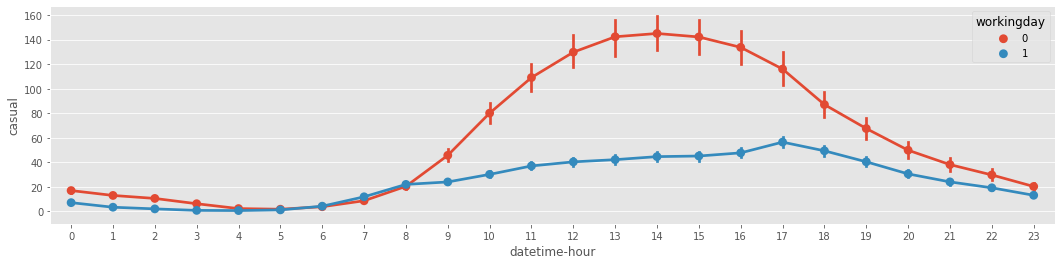

In [151]:
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

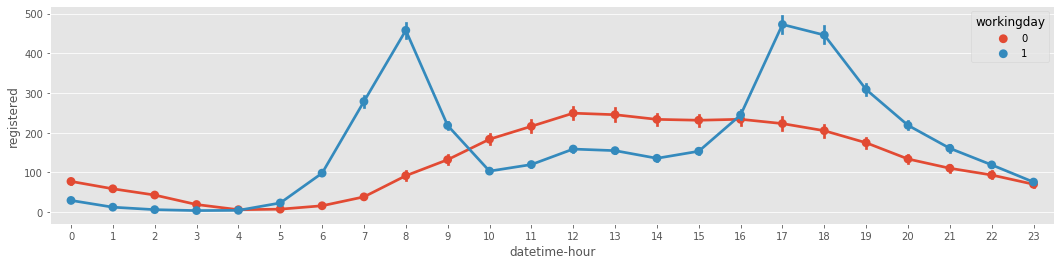

In [153]:
plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

#### datetime-year & datetime-month

In [171]:
#년도가 바뀜에 따라 성장하는 트렌드를 알수 없으니 연+월 라벨을 추가해보자
train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')
test["datetime-year_month"] = test["datetime-year"].astype('str') + '-' + test["datetime-month"].astype('str')

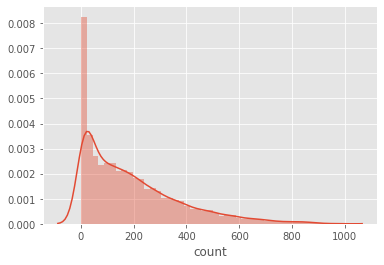

In [167]:
sns.distplot(train["count"])

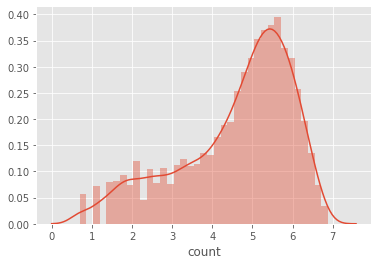

In [170]:
import numpy as np
sns.distplot(np.log(train["count"]+1))

### Train

In [227]:
# feature_names = ["season", "holiday", "workingday", "weather",
#                  "temp", "atemp", "humidity", "windspeed",
#                  "datetime-year", "datetime-hour", "datetime-dayofweek(int)"]

feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", 
                 "datetime-dayofweek(Mon)","datetime-dayofweek(Tue)","datetime-dayofweek(Wed)","datetime-dayofweek(Thu)",
                 "datetime-dayofweek(Fri)","datetime-dayofweek(Sat)","datetime-dayofweek(Sun)"]

feature_regi = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                "timetowork","timetohome",
                "datetime-year", "datetime-hour", 
                 "datetime-dayofweek(Mon)","datetime-dayofweek(Tue)","datetime-dayofweek(Wed)","datetime-dayofweek(Thu)",
                 "datetime-dayofweek(Fri)","datetime-dayofweek(Sat)","datetime-dayofweek(Sun)"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek(Mon)',
 'datetime-dayofweek(Tue)',
 'datetime-dayofweek(Wed)',
 'datetime-dayofweek(Thu)',
 'datetime-dayofweek(Fri)',
 'datetime-dayofweek(Sat)',
 'datetime-dayofweek(Sun)']

In [228]:
X_train = train[feature_names]
X_train_regi = train[feature_regi]
print(X_train.shape)

(10886, 17)


In [229]:
X_test = test[feature_names]
X_test_regi = test[feature_regi]
print(X_test.shape)

(6493, 17)


In [230]:
y_train_count = train["count"]
y_train_count.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [231]:
y_train_log_count = np.log(y_train_count+1)
y_train_log_count.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [232]:
y_train_casual = train["casual"]
print(y_train_casual.shape)
y_train_casual.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [233]:
y_train_log_casual = np.log(y_train_casual + 1)
y_train_log_casual.head()

0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: casual, dtype: float64

In [234]:
y_train_regi = train["registered"]
y_train_regi.head()

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [235]:
y_train_log_regi = np.log(y_train_regi+1)
y_train_log_regi.head()

0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered, dtype: float64

### User Random Forest

In [222]:
from sklearn.ensemble import RandomForestRegressor
    
model = RandomForestRegressor(n_estimators=15,
                             n_jobs=-1,
                             random_state=12)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
                      oob_score=False, random_state=12, verbose=0,
                      warm_start=False)

### Random Search(Coarse)

In [219]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error

n_estimators = 15

num_loop = 20
num_epoch = 20

coarse_hyperparameters_list = []

for epoch in range(num_epoch) :
    max_depth = np.random.randint(low = 2, high = 100)
    max_features = np.random.uniform(low = 0.1, high = 1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)
    
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv=20)
    y_predict_log_regi = cross_val_predict(model, X_train_regi, y_train_log_regi, cv=20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)
    
    y_predict_casual = np.exp(y_predict_log_casual) -1
    y_predict_regi = np.exp(y_predict_log_regi) -1
    y_predict_count = np.exp(y_predict_log_count) -1
    
    y_predict = np.sqrt((y_predict_casual + y_predict_regi) * y_predict_count)
    
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    hyperparameters = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features,
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0 n_estimators = 15, max_depth = 72, max_features = 0.112933, Score = 0.58681
 1 n_estimators = 15, max_depth = 33, max_features = 0.837706, Score = 0.35253
 2 n_estimators = 15, max_depth = 99, max_features = 0.889231, Score = 0.35375
 3 n_estimators = 15, max_depth = 21, max_features = 0.578677, Score = 0.35975
 4 n_estimators = 15, max_depth = 58, max_features = 0.453541, Score = 0.37261
 5 n_estimators = 15, max_depth = 35, max_features = 0.673024, Score = 0.35470
 6 n_estimators = 15, max_depth = 34, max_features = 0.635969, Score = 0.35544
 7 n_estimators = 15, max_depth = 38, max_features = 0.186731, Score = 0.48938
 8 n_estimators = 15, max_depth = 15, max_features = 0.145254, Score = 0.55804
 9 n_estimators = 15, max_depth = 26, max_features = 0.564761, Score = 0.36027
10 n_estimators = 15, max_depth = 60, max_features = 0.178020, Score = 0.48938
11 n_estimators = 15, max_depth = 19, max_features = 0.984126, Score = 0.35245
12 n_estimators = 15, max_depth = 30, max_features =

,epoch,max_depth,max_features,n_estimators,score
11,11,19,0.984126,15,0.352453
1,1,33,0.837706,15,0.352526
12,12,30,0.999245,15,0.353583
2,2,99,0.889231,15,0.353747
5,5,35,0.673024,15,0.354698
6,6,34,0.635969,15,0.355436
3,3,21,0.578677,15,0.359747
9,9,26,0.564761,15,0.360271
18,18,26,0.516671,15,0.364782
15,15,12,0.608536,15,0.366525


#### Coarse Search 로 나온 상위 5개의 max_depth, max_features 범위 참고하여 다시 Random Search
max_depth = np.random.randint(low = 40, high = 100)
max_features = np.random.uniform(low = 0.7, high = 1.0)

In [ ]:
n_estimators = 15

num_loop = 20
num_epoch = 20

fine_hyperparameters_list = []

for epoch in range(num_epoch) :
    max_depth = np.random.randint(low = 40, high = 100)
    max_features = np.random.uniform(low = 0.7, high = 1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)
    
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv=20)
    y_predict_log_regi = cross_val_predict(model, X_train_regi, y_train_log_regi, cv=20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)
    
    y_predict_casual = np.exp(y_predict_log_casual) -1
    y_predict_regi = np.exp(y_predict_log_regi) -1
    y_predict_count = np.exp(y_predict_log_count) -1
    
    y_predict = np.sqrt((y_predict_casual + y_predict_regi) * y_predict_count)
    
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    hyperparameters = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features,
    }
    
    fine_hyperparameters_list.append(hyperparameters)
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

fine_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
fine_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(fine_hyperparameters_list.shape)
fine_hyperparameters_list.head(10)

In [ ]:
best_hyperparamters = fine_hyperparameters_list.iloc[0]
best_max_depth = best_hyperparameters["max_depth"]
best_max_features = best_hyperparameters["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

### Predict

In [236]:
best_n_estimators = 3000
best_max_depth = 97
best_max_features = 0.897703

model = RandomForestRegressor(n_estimators = best_n_estimators,
                             max_depth = best_max_depth,
                             max_features = best_max_features,
                             random_state = 37,
                             n_jobs =-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=97,
                      max_features=0.897703, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [238]:
model.fit(X_train, y_train_log_casual)
log_casual_predictions = model.predict(X_test)

model.fit(X_train_regi, y_train_log_regi)
log_regi_predictions = model.predict(X_test_regi)

model.fit(X_train, y_train_log_count)
log_count_predictions = model.predict(X_test)

casual_predictions = np.exp(log_casual_predictions) -1
regi_predictions = np.exp(log_regi_predictions) -1
count_predictions = np.exp(log_count_predictions) -1

predictions = np.sqrt((casual_predictions + regi_predictions) * count_predictions)
print(predictions.shape)

predictions

(6493,)


array([10.97306985,  4.64782641,  2.58262994, ..., 98.38108898,
       96.69519586, 48.34574098])

### Submit

In [240]:
submission  = pd.read_csv("sampleSubmission.csv")
print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [241]:
submission["count"] = predictions
print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.973070
1,2011-01-20 01:00:00,4.647826
2,2011-01-20 02:00:00,2.582630
3,2011-01-20 03:00:00,2.752283
4,2011-01-20 04:00:00,2.480389


In [245]:
submission.to_csv("bike_sharing_demands_200518(1)", index=False)